<a href="https://colab.research.google.com/github/joseaneOliF/transfer-learning-python/blob/main/CatsAndDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install tensorflow keras matplotlib numpy


In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os


In [39]:
import tensorflow_datasets as tfds

dataset_name = "cats_vs_dogs"
(train_ds, test_ds), dataset_info = tfds.load(dataset_name, split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

In [40]:
base_model = keras.applications.MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Congela os pesos do modelo pré-treinado

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')  # Saída binária: 0 ou 1 (Gato ou Cachorro)
])

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
def resize_image(image, label):
  """Resizes the image to the desired input shape."""
  image = tf.image.resize(image, (160, 160))
  return image, label

# Apply the resize function to the datasets using map
train_ds = train_ds.map(resize_image)
test_ds = test_ds.map(resize_image)

# Now batch the datasets
train_ds = train_ds.batch(32)
test_ds = test_ds.batch(32)

# Train the model
history = model.fit(train_ds, validation_data=test_ds, epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 517s 846ms/step - accuracy: 0.7178 - loss: 0.5670 - val_accuracy: 0.7926 - val_loss: 0.4443
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 548s 927ms/step - accuracy: 0.7952 - loss: 0.4361 - val_accuracy: 0.7885 - val_loss: 0.4431
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 536s 921ms/step - accuracy: 0.8089 - loss: 0.4168 - val_accuracy: 0.8022 - val_loss: 0.4224
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 486s 836ms/step - accuracy: 0.8145 - loss: 0.4004 - val_accuracy: 0.8108 - val_loss: 0.4117
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 486s 834ms/step - accuracy: 0.8238 - loss: 0.3857 - val_accuracy: 0.8040 - val_loss: 0.4189


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


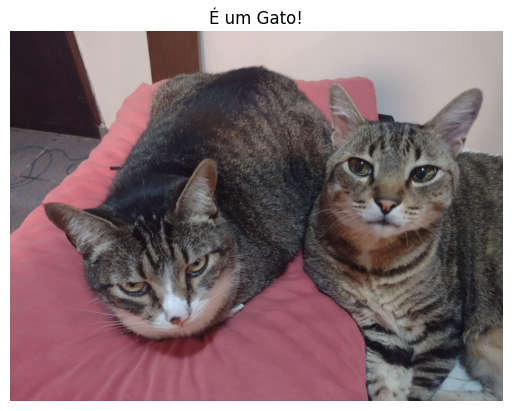

In [56]:
import matplotlib.image as mpimg

image = "./IMG/TaiLungEChubiruba.jpeg"
def predict_image(image_path):
    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"Error: File not found at path: {image_path}")
        return # Exit the function to prevent further errors

    img = keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img_array = keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    # Exibir a imagem
    img_to_show = mpimg.imread(image_path)
    plt.imshow(img_to_show)
    plt.axis('off')  # Oculta os eixos
    plt.title("É um Cachorro!" if prediction[0] > 0.5 else "É um Gato!")
    plt.show()

# Chamar a função para exibir a imagem e previsão
predict_image(image)

In [53]:
model.save('my_model.keras')